In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [88]:
insurance = pd.read_csv(r"/Users/prathameshbodhankar/Downloads/Insurance_Dataset.csv")

In [89]:
insurance.head()

,Occupation,Cholesterol_level,Age,Heart_disease_history,Other_major_disease_history,Gender,Body_mass_index,Smoking_status,Location,Weight,Alcohol_consumption,Exercise_regimen,Weight_change_last_year,Body_fat_percentage,Insurance_cost
0,Salaried,125 to 150,28,1,0,Male,31.2,Unknown,Chennai,67,Rare,Moderate,1,25,20978
1,Student,150 to 175,50,0,0,Male,34.2,formerly smoked,Jaipur,58,Rare,Moderate,3,27,6170
2,Business,200 to 225,68,0,0,Female,40.4,formerly smoked,Jaipur,73,Daily,Extreme,0,32,28382
3,Business,175 to 200,51,0,0,Female,22.9,Unknown,Chennai,71,Rare,No,3,37,27148
4,Student,150 to 175,44,0,1,Male,26.5,never smoked,Bangalore,74,No,Extreme,0,34,29616


In [90]:
insurance.shape

(25000, 15)

In [91]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Occupation                   25000 non-null  object 
 1   Cholesterol_level            25000 non-null  object 
 2   Age                          25000 non-null  int64  
 3   Heart_disease_history        25000 non-null  int64  
 4   Other_major_disease_history  25000 non-null  int64  
 5   Gender                       25000 non-null  object 
 6   Body_mass_index              24010 non-null  float64
 7   Smoking_status               25000 non-null  object 
 8   Location                     25000 non-null  object 
 9   Weight                       25000 non-null  int64  
 10  Alcohol_consumption          25000 non-null  object 
 11  Exercise_regimen             25000 non-null  object 
 12  Weight_change_last_year      25000 non-null  int64  
 13  Body_fat_percent

In [92]:
insurance.describe()

,Age,Heart_disease_history,Other_major_disease_history,Body_mass_index,Weight,Weight_change_last_year,Body_fat_percentage,Insurance_cost
count,25000.000000,25000.000000,25000.000000,24010.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,44.918320,0.054640,0.098160,31.393328,71.610480,2.517960,28.812280,27147.407680
std,16.107492,0.227281,0.297537,7.876535,9.325183,1.690335,8.632382,14323.691832
min,16.000000,0.000000,0.000000,12.300000,52.000000,0.000000,11.000000,2468.000000
25%,31.000000,0.000000,0.000000,26.100000,64.000000,1.000000,21.000000,16042.000000
50%,45.000000,0.000000,0.000000,30.500000,72.000000,3.000000,31.000000,27148.000000
75%,59.000000,0.000000,0.000000,35.600000,78.000000,4.000000,36.000000,37020.000000
max,74.000000,1.000000,1.000000,100.600000,96.000000,6.000000,42.000000,67870.000000


In [93]:
#insurance['Age'].value_counts()

In [94]:
numeric_feature = insurance.select_dtypes(include=['int64', 'float64']).columns
categorical_feature = [feature for feature in insurance.columns if insurance[feature].dtype == 'object']
print(numeric_feature)
print(categorical_feature)

Index(['Age', 'Heart_disease_history', 'Other_major_disease_history',
       'Body_mass_index', 'Weight', 'Weight_change_last_year',
       'Body_fat_percentage', 'Insurance_cost'],
      dtype='object')
['Occupation', 'Cholesterol_level', 'Gender', 'Smoking_status', 'Location', 'Alcohol_consumption', 'Exercise_regimen']


In [95]:
for col in categorical_feature:
    print(insurance[col].value_counts())
    print('-------')


Occupation
Student     10169
Business    10020
Salaried     4811
Name: count, dtype: int64
-------
Cholesterol_level
150 to 175    8763
125 to 150    8339
200 to 225    2963
175 to 200    2881
225 to 250    2054
Name: count, dtype: int64
-------
Gender
Male      16422
Female     8578
Name: count, dtype: int64
-------
Smoking_status
never smoked       9249
Unknown            7555
formerly smoked    4329
smokes             3867
Name: count, dtype: int64
-------
Location
Bangalore      1742
Jaipur         1706
Bhubaneswar    1704
Mangalore      1697
Delhi          1680
Ahmedabad      1677
Guwahati       1672
Chennai        1669
Kanpur         1664
Nagpur         1663
Mumbai         1658
Lucknow        1637
Pune           1622
Kolkata        1620
Surat          1589
Name: count, dtype: int64
-------
Alcohol_consumption
Rare     13752
No        8541
Daily     2707
Name: count, dtype: int64
-------
Exercise_regimen
Moderate    14638
Extreme      5248
No           5114
Name: count, dtype: int

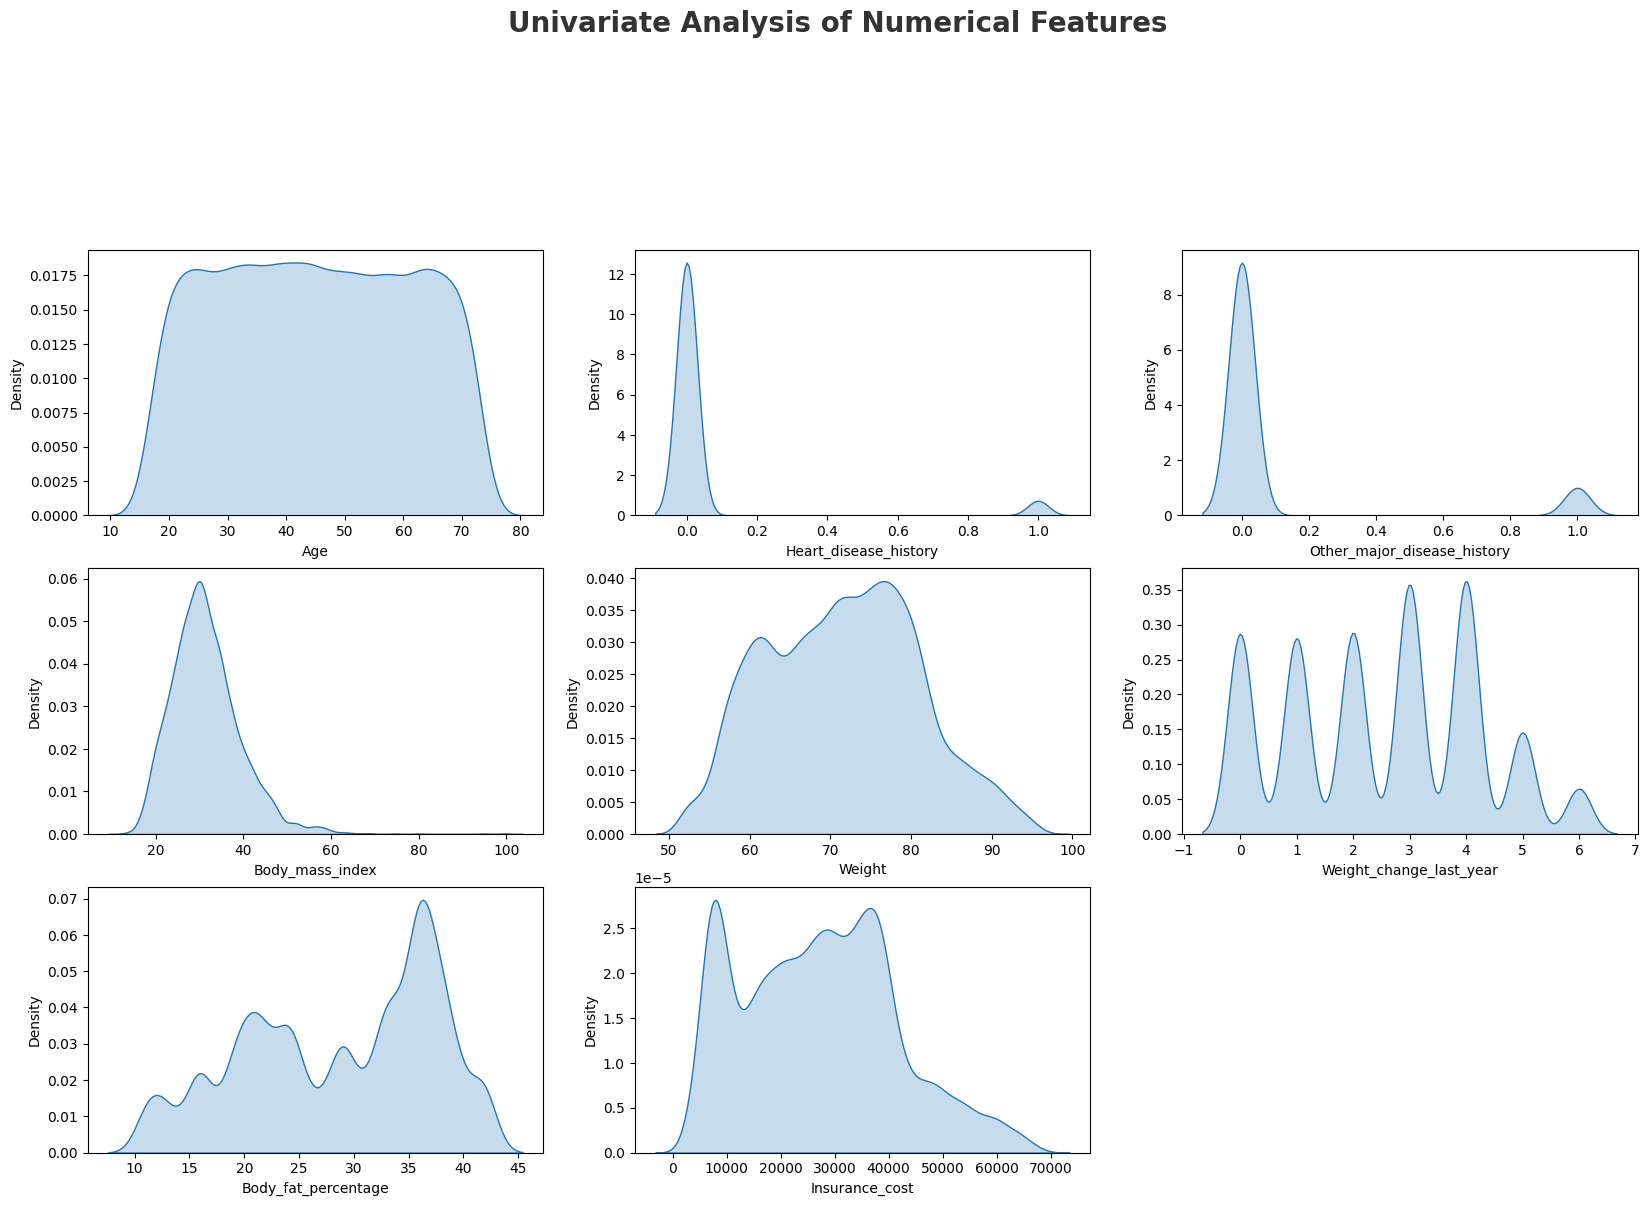

In [96]:
plt.figure(figsize=(20, 20))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0,len(numeric_feature)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x = insurance[numeric_feature[i]], fill = True)
    

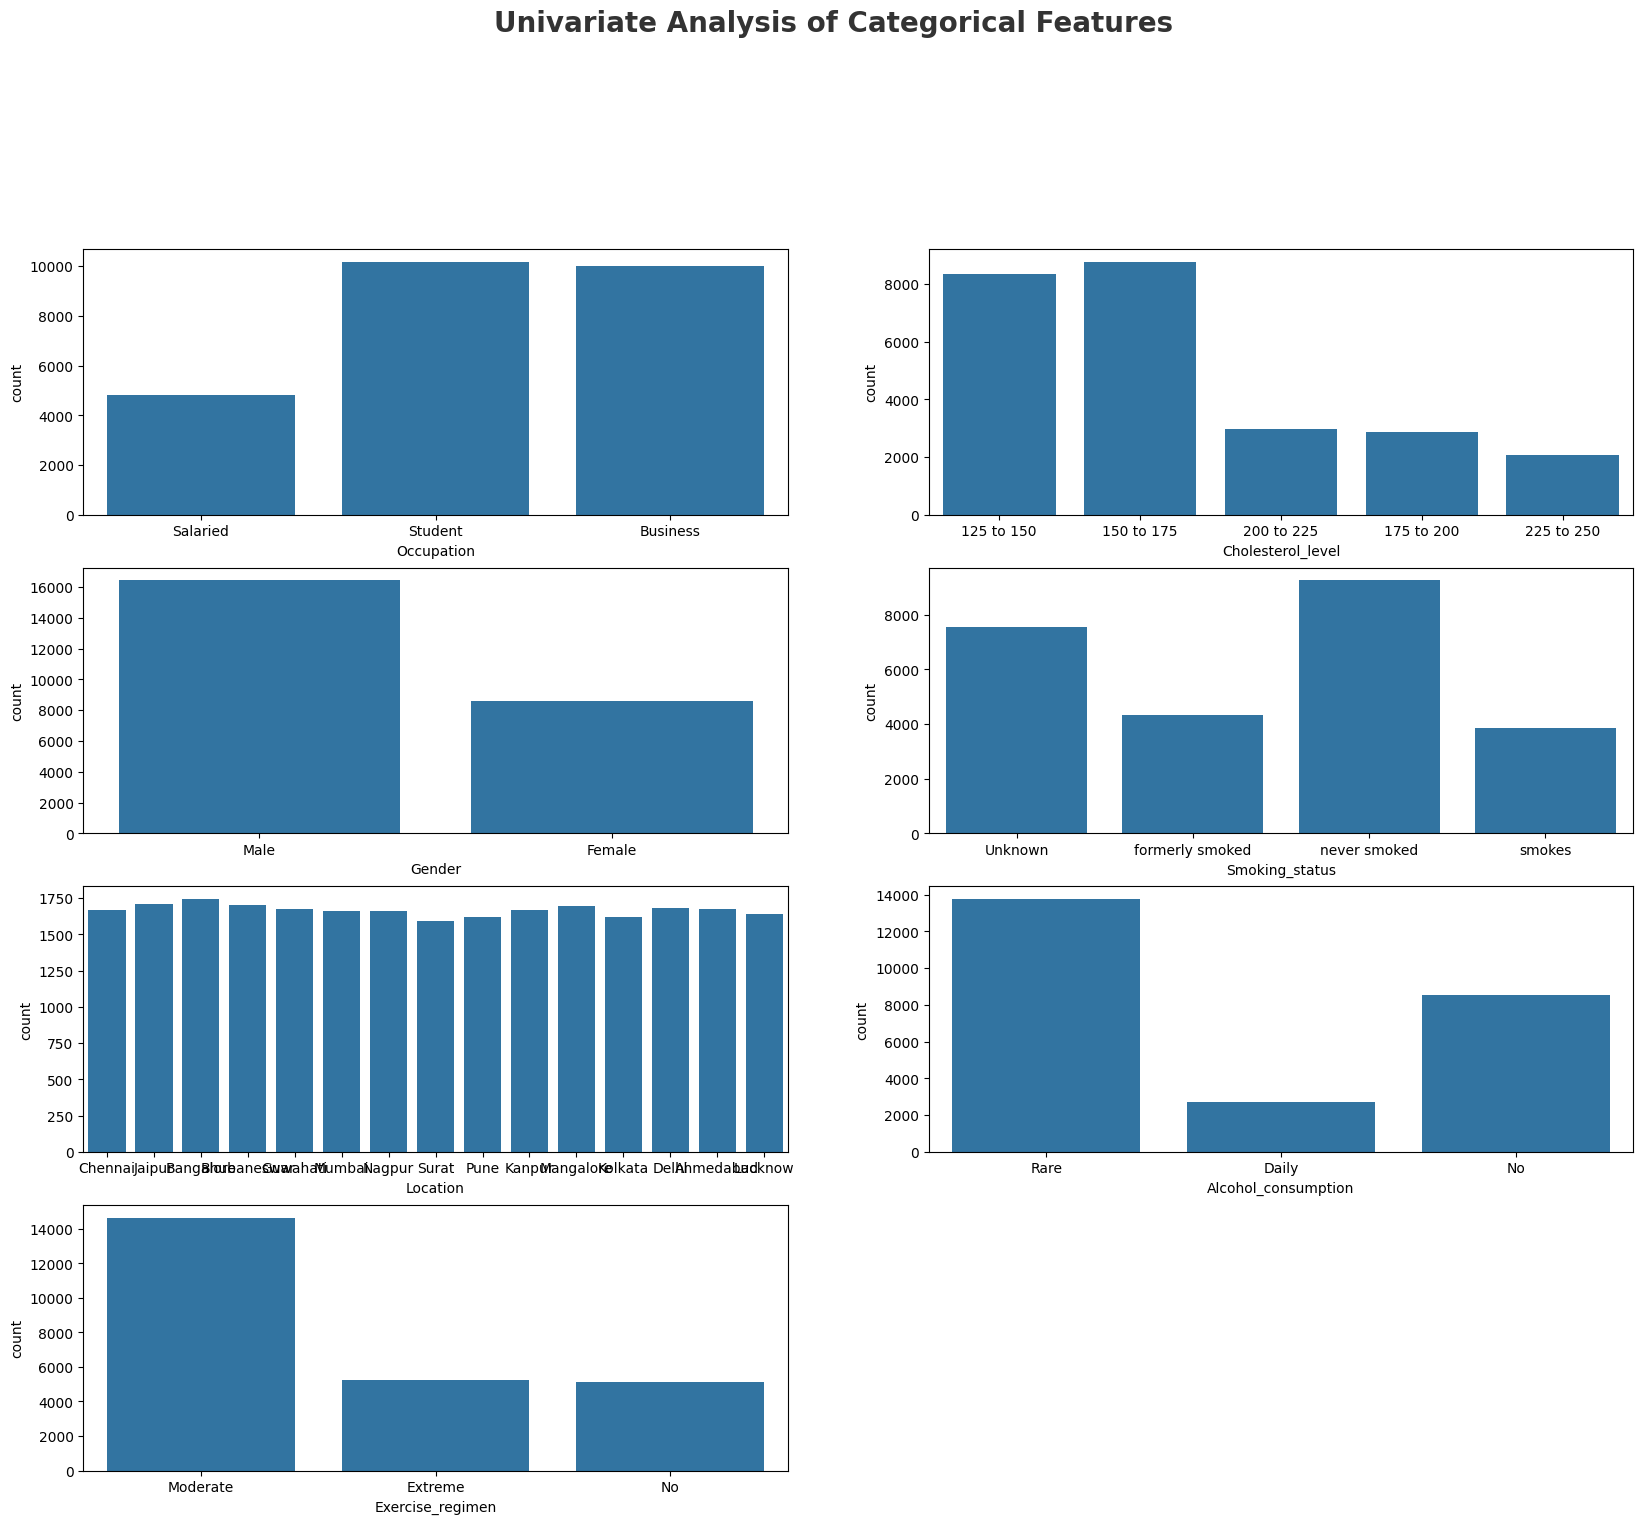

In [97]:
plt.figure(figsize=(20, 20))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0,len(categorical_feature)):
    plt.subplot(5,2,i+1)
    sns.countplot(x = insurance[categorical_feature[i]], fill = True)
  
   

In [98]:
for i in range(0,len(categorical_feature)):
    
    print(insurance[categorical_feature].nunique())

Occupation              3
Cholesterol_level       5
Gender                  2
Smoking_status          4
Location               15
Alcohol_consumption     3
Exercise_regimen        3
dtype: int64
Occupation              3
Cholesterol_level       5
Gender                  2
Smoking_status          4
Location               15
Alcohol_consumption     3
Exercise_regimen        3
dtype: int64
Occupation              3
Cholesterol_level       5
Gender                  2
Smoking_status          4
Location               15
Alcohol_consumption     3
Exercise_regimen        3
dtype: int64
Occupation              3
Cholesterol_level       5
Gender                  2
Smoking_status          4
Location               15
Alcohol_consumption     3
Exercise_regimen        3
dtype: int64
Occupation              3
Cholesterol_level       5
Gender                  2
Smoking_status          4
Location               15
Alcohol_consumption     3
Exercise_regimen        3
dtype: int64
Occupation              3

In [99]:
insurance.isnull().sum()

Occupation                       0
Cholesterol_level                0
Age                              0
Heart_disease_history            0
Other_major_disease_history      0
Gender                           0
Body_mass_index                990
Smoking_status                   0
Location                         0
Weight                           0
Alcohol_consumption              0
Exercise_regimen                 0
Weight_change_last_year          0
Body_fat_percentage              0
Insurance_cost                   0
dtype: int64

In [100]:
insurance['Body_mass_index'] = insurance['Body_mass_index'].fillna(insurance['Body_mass_index'].median())


In [101]:
insurance['Body_mass_index'] = insurance['Body_mass_index'].astype(int)

In [102]:
insurance.isnull().sum()

Occupation                     0
Cholesterol_level              0
Age                            0
Heart_disease_history          0
Other_major_disease_history    0
Gender                         0
Body_mass_index                0
Smoking_status                 0
Location                       0
Weight                         0
Alcohol_consumption            0
Exercise_regimen               0
Weight_change_last_year        0
Body_fat_percentage            0
Insurance_cost                 0
dtype: int64

In [103]:
# Correlation heatmap for numerical variables
# plt.figure(figsize=(10, 8))
# sns.heatmap(insurance[numeric_feature].corr(), annot=True, cmap='coolwarm')
# plt.title('Correlation Heatmap')
# plt.show()

In [104]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_feature

# Initialize LabelEncoder
label_encoders = {}

# Label Encoding to categorical features
for col in categorical_feature:
    le = LabelEncoder()
    insurance[col] = le.fit_transform(insurance[col])  # Transform categorical data
    label_encoders[col] = le  # Store encoder for future use

print("Label Encoding applied to:", categorical_feature)

Label Encoding applied to: ['Occupation', 'Cholesterol_level', 'Gender', 'Smoking_status', 'Location', 'Alcohol_consumption', 'Exercise_regimen']


In [105]:
insurance.head()

,Occupation,Cholesterol_level,Age,Heart_disease_history,Other_major_disease_history,Gender,Body_mass_index,Smoking_status,Location,Weight,Alcohol_consumption,Exercise_regimen,Weight_change_last_year,Body_fat_percentage,Insurance_cost
0,1,0,28,1,0,1,31,0,3,67,2,1,1,25,20978
1,2,1,50,0,0,1,34,1,6,58,2,1,3,27,6170
2,0,3,68,0,0,0,40,1,6,73,0,0,0,32,28382
3,0,2,51,0,0,0,22,0,3,71,2,2,3,37,27148
4,2,1,44,0,1,1,26,2,1,74,1,0,0,34,29616


In [106]:
from sklearn.model_selection import train_test_split

# Standardize features
from sklearn.preprocessing import StandardScaler



In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [108]:
x = insurance.drop(['Insurance_cost'], axis=1)
y = insurance['Insurance_cost']

In [109]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Occupation                   25000 non-null  int64
 1   Cholesterol_level            25000 non-null  int64
 2   Age                          25000 non-null  int64
 3   Heart_disease_history        25000 non-null  int64
 4   Other_major_disease_history  25000 non-null  int64
 5   Gender                       25000 non-null  int64
 6   Body_mass_index              25000 non-null  int64
 7   Smoking_status               25000 non-null  int64
 8   Location                     25000 non-null  int64
 9   Weight                       25000 non-null  int64
 10  Alcohol_consumption          25000 non-null  int64
 11  Exercise_regimen             25000 non-null  int64
 12  Weight_change_last_year      25000 non-null  int64
 13  Body_fat_percentage          25000 non-null  i

In [110]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [111]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [112]:
X_train.isnull().sum()

Occupation                     0
Cholesterol_level              0
Age                            0
Heart_disease_history          0
Other_major_disease_history    0
Gender                         0
Body_mass_index                0
Smoking_status                 0
Location                       0
Weight                         0
Alcohol_consumption            0
Exercise_regimen               0
Weight_change_last_year        0
Body_fat_percentage            0
dtype: int64

In [113]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [114]:
y_train_pred_lr = lr.predict(X_train)
y_test_pred_lr = lr.predict(X_test)

In [115]:
# Calculate metrics
mse_train_lr = mean_squared_error(y_train, y_train_pred_lr)
mae_train_lr = mean_absolute_error(y_train, y_train_pred_lr)
rmse_train_lr = np.sqrt(mse_train_lr)
r2_train_lr = r2_score(y_train, y_train_pred_lr)

mse_test_lr = mean_squared_error(y_test, y_test_pred_lr)
mae_test_lr = mean_absolute_error(y_test, y_test_pred_lr)
rmse_test_lr = np.sqrt(mse_test_lr)
r2_test_lr = r2_score(y_test, y_test_pred_lr)

In [116]:
print("Linear Regression Results:")
print("Model performance for Training set")
print(f"- Root Mean Squared Error: {rmse_train_lr}")
print(f"- Mean Absolute Error: {mae_train_lr}")
print(f"- R2 Score: {r2_train_lr}")
print("----------------------------------")
print("Model performance for Test set")
print(f"- Root Mean Squared Error: {rmse_test_lr}")
print(f"- Mean Absolute Error: {mae_test_lr}")
print(f"- R2 Score: {r2_test_lr}")
print("="*15)

Linear Regression Results:
Model performance for Training set
- Root Mean Squared Error: 3452.944026299081
- Mean Absolute Error: 2781.571227301412
- R2 Score: 0.9419858848109164
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3439.5311925573196
- Mean Absolute Error: 2770.8481211081967
- R2 Score: 0.9419324818256961


In [117]:
from sklearn.model_selection import cross_val_score

In [118]:
dtr =  DecisionTreeRegressor(random_state = 0)
dtr.fit(X_train, y_train)



DecisionTreeRegressor(random_state=0)

In [119]:
y_train_pred_dtr = dtr.predict(X_train)
y_test_pred_dtr = dtr.predict(X_test)

In [120]:
cross_val_score(dtr, X_train, y_train_pred_dtr)

array([0.89838095, 0.89966371, 0.89815684, 0.89963784, 0.89962899])

In [121]:
cross_val_score(dtr, X_test, y_test_pred_dtr)

array([0.89734902, 0.88943446, 0.89178592, 0.89568364, 0.8907802 ])

In [122]:
mse_train_dtr = mean_squared_error(y_train, y_train_pred_dtr)
mae_train_dtr = mean_absolute_error(y_train, y_train_pred_dtr)
rmse_train_dtr = np.sqrt(mse_train_dtr)
r2_train_dtr = r2_score(y_train, y_train_pred_dtr)

mse_test_dtr = mean_squared_error(y_test, y_test_pred_dtr)
mae_test_dtr = mean_absolute_error(y_test, y_test_pred_dtr)
rmse_test_dtr = np.sqrt(mse_test_dtr)
r2_test_dtr = r2_score(y_test, y_test_pred_dtr)

In [123]:
print("Decision tree Regression Results:")
print("Model performance for Training set")
print(f"- Root Mean Squared Error: {rmse_train_dtr}")
print(f"- Mean Absolute Error: {mae_train_dtr}")
print(f"- R2 Score: {r2_train_dtr}")
print("----------------------------------")
print("Model performance for Test set")
print(f"- Root Mean Squared Error: {rmse_test_dtr}")
print(f"- Mean Absolute Error: {mae_test_dtr}")
print(f"- R2 Score: {r2_test_dtr}")
print("="*15)

Decision tree Regression Results:
Model performance for Training set
- Root Mean Squared Error: 0.0
- Mean Absolute Error: 0.0
- R2 Score: 1.0
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4562.363517564115
- Mean Absolute Error: 3562.558
- R2 Score: 0.8978320847958269
